**Installing Libraries and Importing the Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
pip install scikit-plot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn import svm
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
%matplotlib inline



In [ ]:
df = pd.read_csv("risk_factors_cervical_cancer.csv")
len(df)

858

In [ ]:
df.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [ ]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Data Preprocessing**

**Replacing all the question marks with null value in the dataset**

In [ ]:
df = df.replace("?", np.nan)
df = df.apply(pd.to_numeric, errors='coerce') 


In [ ]:
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

 **Dealing with the missing values  from the given dataset, Imputing the missing value of the categorical variables with 0 or 1 and continuous variables with median value**

In [ ]:

df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())
df['Number of sexual partners'].isnull().any()

df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())
df['First sexual intercourse'].isnull().any()

df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())
df['Num of pregnancies'].isnull().any()

df['Smokes'] = df['Smokes'].fillna(df['Smokes'].median())
df['Smokes'].isnull().any()

df['Smokes (years)'] = df['Smokes (years)'].fillna(1)
df['Smokes (years)'].isnull().any()

df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())
df['Smokes (packs/year)'].isnull().any()

df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(df['Hormonal Contraceptives'].median())
df['Hormonal Contraceptives'].isnull().any()

df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
df['Hormonal Contraceptives (years)'].isnull().any()

df['IUD'] = df['IUD'].fillna(0)
df['IUD'].isnull().any()

df['IUD (years)'] = df['IUD (years)'].fillna(0)
df['IUD (years)'].isnull().any()

df['STDs'] = df['STDs'].fillna(1)
df['STDs'].isnull().any()

df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs (number)'].isnull().any()

df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:condylomatosis'].isnull().any()

df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median())
df['STDs:cervical condylomatosis'].isnull().any()

df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vaginal condylomatosis'].isnull().any()

df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'].isnull().any()

df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:syphilis'].isnull().any()


df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:pelvic inflammatory disease'].isnull().any()

df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:genital herpes'].isnull().any()

df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:molluscum contagiosum'].isnull().any()

df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].median())
df['STDs:AIDS'].isnull().any()

df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:HIV'].isnull().any()

df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:Hepatitis B'].isnull().any()

df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())
df['STDs:HPV'].isnull().any()

df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(df['STDs: Time since first diagnosis'].median())
df['STDs: Time since first diagnosis'].isnull().any()

df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].fillna(df['STDs: Time since last diagnosis'].median())
df['STDs: Time since last diagnosis'].isnull().any()
 


False

**Dealing with the missing values  from the given dataset, Imputing the missing value of the categorical variables with 0 or 1 and continuous variables with median value**

In [ ]:

df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].mean())
df['Number of sexual partners'].isnull().any()

df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].mean())
df['First sexual intercourse'].isnull().any()

df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].mean())
df['Num of pregnancies'].isnull().any()

df['Smokes'] = df['Smokes'].fillna(df['Smokes'].mean())
df['Smokes'].isnull().any()

df['Smokes (years)'] = df['Smokes (years)'].fillna(1)
df['Smokes (years)'].isnull().any()

df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].mean())
df['Smokes (packs/year)'].isnull().any()

df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(df['Hormonal Contraceptives'].mean())
df['Hormonal Contraceptives'].isnull().any()

df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].mean())
df['Hormonal Contraceptives (years)'].isnull().any()

df['IUD'] = df['IUD'].fillna(0)
df['IUD'].isnull().any()

df['IUD (years)'] = df['IUD (years)'].fillna(0)
df['IUD (years)'].isnull().any()

df['STDs'] = df['STDs'].fillna(1)
df['STDs'].isnull().any()

df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].mean())
df['STDs (number)'].isnull().any()

df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].mean())
df['STDs:condylomatosis'].isnull().any()

df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].mean())
df['STDs:cervical condylomatosis'].isnull().any()

df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].mean())
df['STDs:vaginal condylomatosis'].isnull().any()

df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].mean())
df['STDs:vulvo-perineal condylomatosis'].isnull().any()

df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].mean())
df['STDs:syphilis'].isnull().any()


df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].mean())
df['STDs:pelvic inflammatory disease'].isnull().any()

df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].mean())
df['STDs:genital herpes'].isnull().any()

df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].mean())
df['STDs:molluscum contagiosum'].isnull().any()

df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].mean())
df['STDs:AIDS'].isnull().any()

df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].mean())
df['STDs:HIV'].isnull().any()

df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].mean())
df['STDs:Hepatitis B'].isnull().any()

df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].mean())
df['STDs:HPV'].isnull().any()

df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(df['STDs: Time since first diagnosis'].mean())
df['STDs: Time since first diagnosis'].isnull().any()

df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].fillna(df['STDs: Time since last diagnosis'].mean())
df['STDs: Time since last diagnosis'].isnull().any()
 


False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [ ]:
df.isnull().any()

Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                False
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives               False
Hormonal Contraceptives (years)       False
IUD                                   False
IUD (years)                           False
STDs                                  False
STDs (number)                         False
STDs:condylomatosis                   False
STDs:cervical condylomatosis          False
STDs:vaginal condylomatosis           False
STDs:vulvo-perineal condylomatosis    False
STDs:syphilis                         False
STDs:pelvic inflammatory disease      False
STDs:genital herpes                   False
STDs:molluscum contagiosum            False
STDs:AIDS                             False
STDs:HIV                        

In [ ]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.216392,0.453144,0.641333,2.256419,0.096737,0.444604,0.214452,0.176627,0.058433,0.0,0.005312,0.057105,0.023904,0.001328,0.001328,0.001328,0.0,0.023904,0.001328,0.002656,0.087413,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.642267,2.791883,1.399325,0.350189,4.057974,2.209657,0.448671,3.519082,0.295771,1.814218,0.410681,0.526440,0.219868,0.0,0.068137,0.217508,0.143183,0.034137,0.034137,0.034137,0.0,0.143183,0.034137,0.048244,0.302545,1.684784,1.644843,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.256419,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Basic Data Visualization

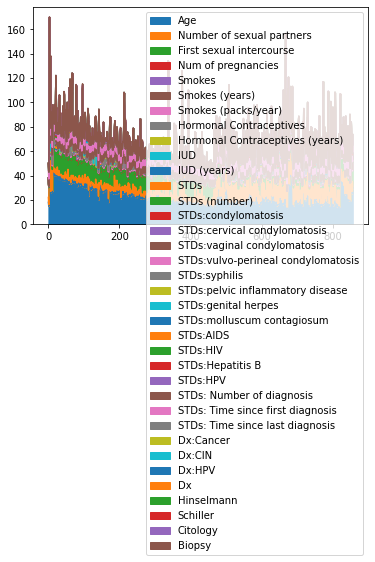

In [ ]:
df.plot.area()

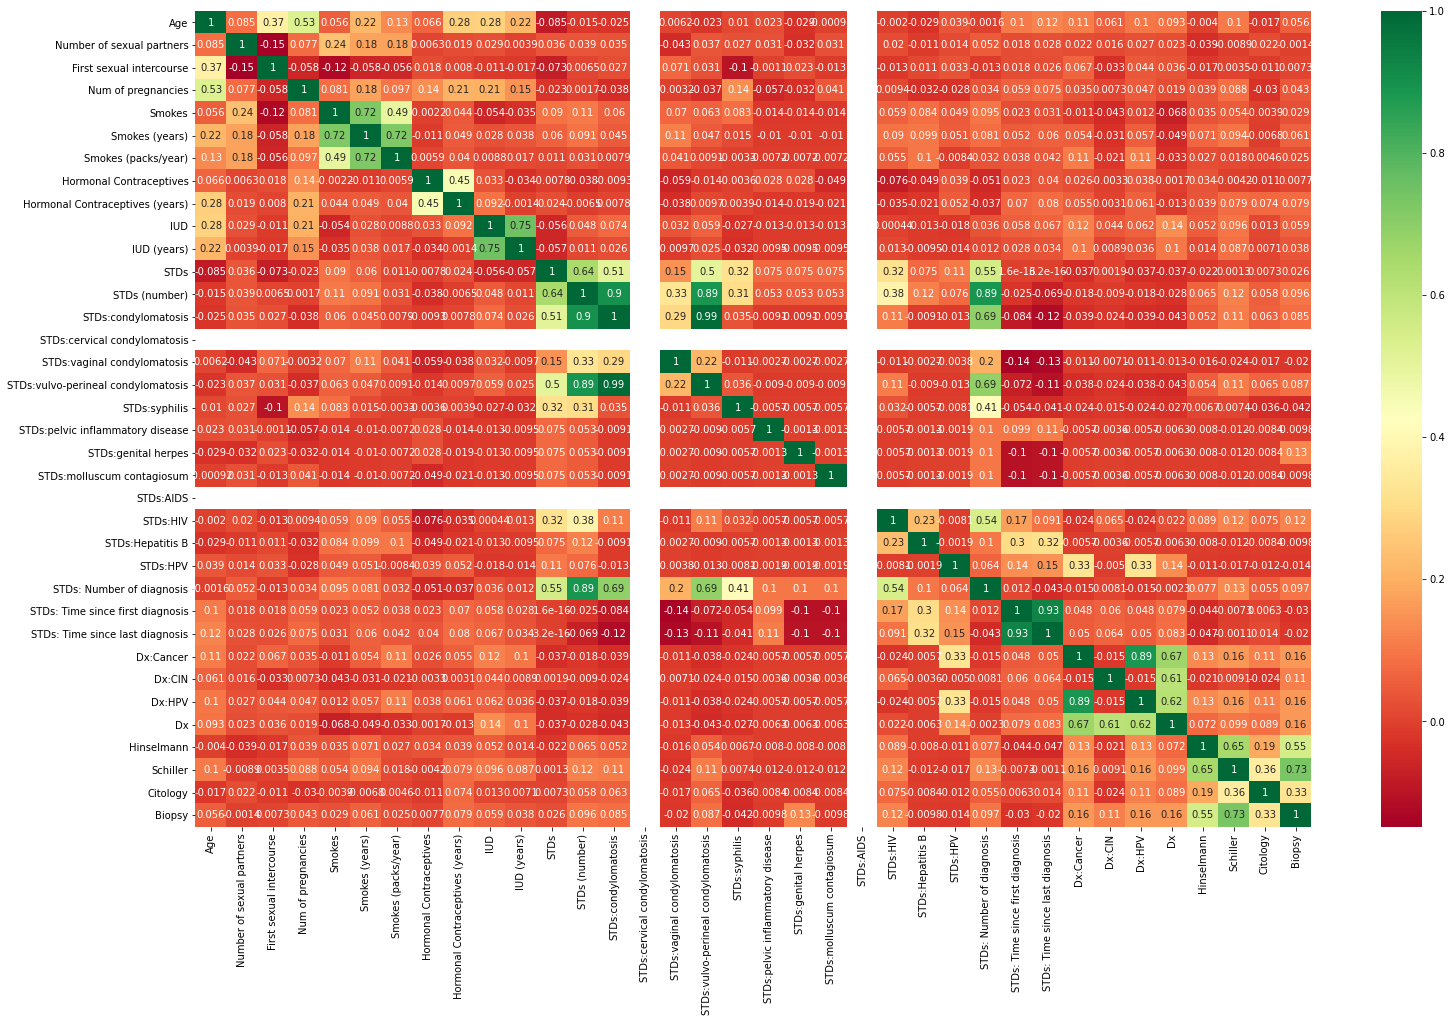

In [ ]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,15))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
df.hist(column="Biopsy")

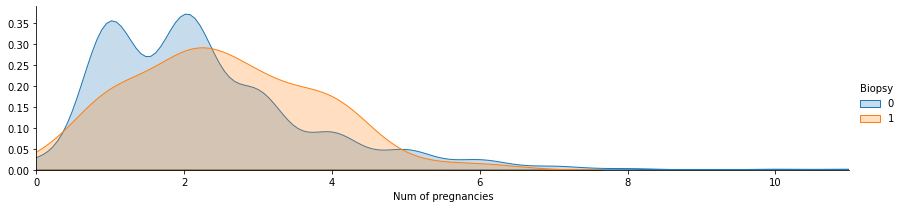

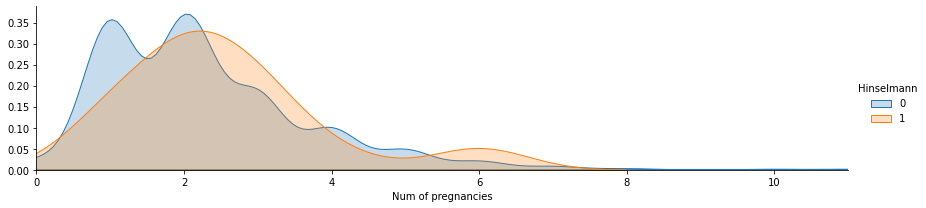

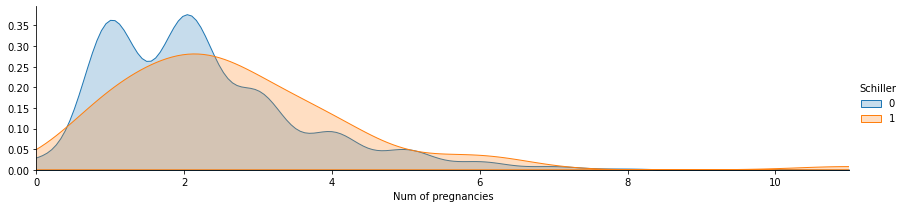

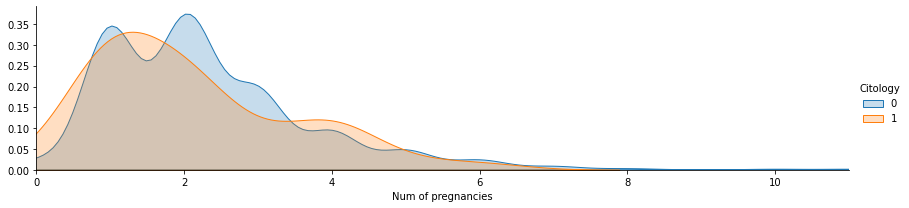

In [ ]:
#continuous to categorical
facet = sns.FacetGrid(df, hue='Biopsy', aspect=4)
facet.map(sns.kdeplot,'Num of pregnancies', shade= True)
facet.set(xlim=(0, df['Num of pregnancies'].max()))
facet.add_legend()
facet = sns.FacetGrid(df, hue='Hinselmann', aspect=4)
facet.map(sns.kdeplot,'Num of pregnancies', shade= True)
facet.set(xlim=(0, df['Num of pregnancies'].max()))
facet.add_legend()
facet = sns.FacetGrid(df, hue='Schiller', aspect=4)
facet.map(sns.kdeplot,'Num of pregnancies', shade= True)
facet.set(xlim=(0, df['Num of pregnancies'].max()))
facet.add_legend()
facet = sns.FacetGrid(df, hue='Citology', aspect=4)
facet.map(sns.kdeplot,'Num of pregnancies', shade= True)
facet.set(xlim=(0, df['Num of pregnancies'].max()))
facet.add_legend()

Mean age of the Women facing the risk of Cervical cancer 26.82051282051282


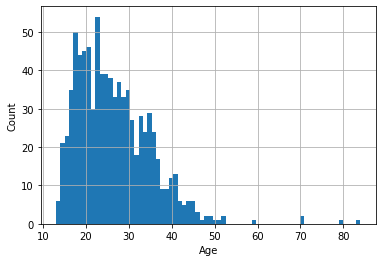

In [ ]:
df['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Count')
print('Mean age of the Women facing the risk of Cervical cancer',df['Age'].mean())

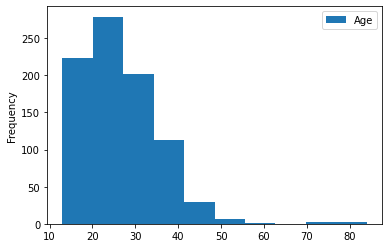

In [ ]:
df.plot.hist(x="Biopsy", y="Age")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


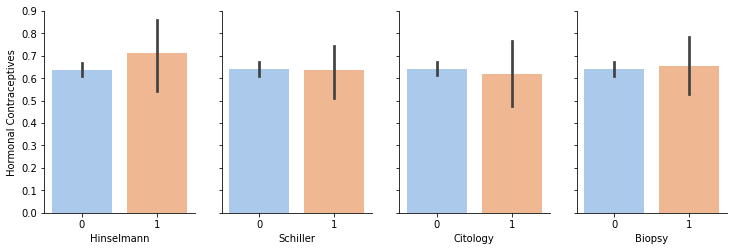

In [ ]:
category_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']
g = sns.PairGrid(df,
                 y_vars=['Hormonal Contraceptives'],
                 x_vars= category_df,
                 aspect=.75, size=3.5)
g.map(sns.barplot, palette="pastel");

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr

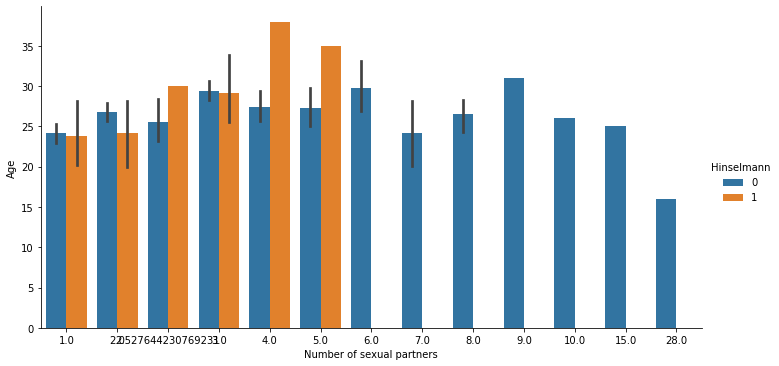

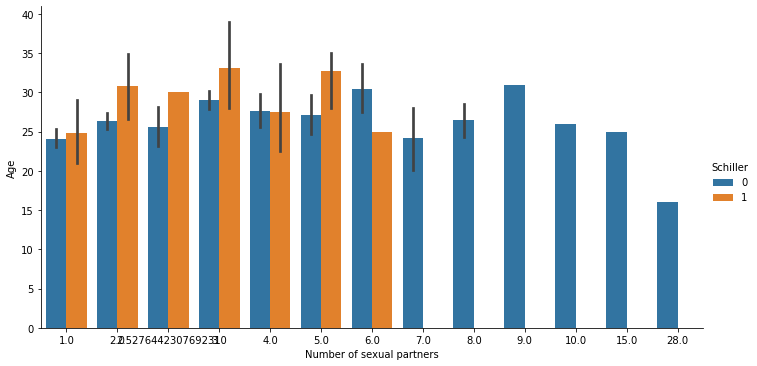

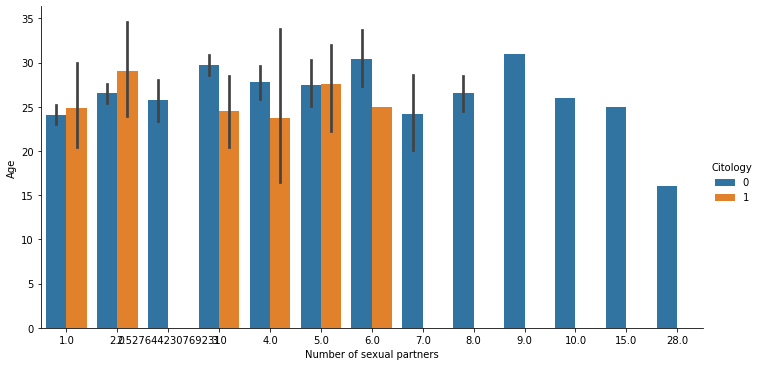

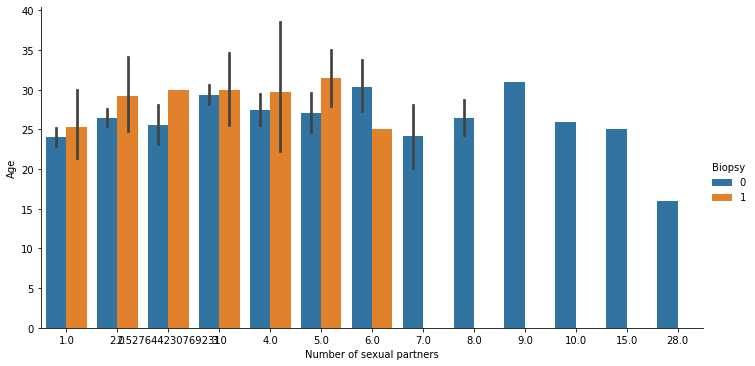

In [ ]:
for feature in category_df:
  
  sns.factorplot(x='Number of sexual partners',y='Age',hue=feature,data=df,aspect=1.95,kind='bar');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean age of the women who started the sexual intercourse 16.99529964747356


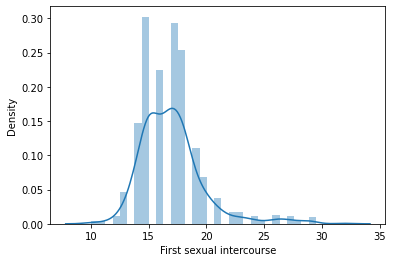

In [ ]:
sns.distplot(df['First sexual intercourse'])
print('Mean age of the women who started the sexual intercourse',df['First sexual intercourse'].mean())

**Set Dependent Variables and Independent Variables**

In [ ]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
y=df["Biopsy"]
x=df.drop(["Biopsy"], axis=1)

**Combination of  Features selection technique**


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_features = SelectKBest(chi2, k = 15)
X_kbest_features = chi2_features.fit_transform(x,y)
print('Original feature number:', x.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 25
Reduced feature number: 15


[0.07351565 0.05309002 0.06246031 0.04751299 0.0108888  0.01756453
 0.01581681 0.02065475 0.05713549 0.00882863 0.0132037  0.00418675
 0.00522082 0.00293194 0.         0.00093922 0.0038792  0.00555131
 0.00067233 0.01347994 0.00118022 0.         0.00630121 0.00102819
 0.00108716 0.00536506 0.00845176 0.00538546 0.0080476  0.01083919
 0.00889808 0.01093024 0.1343878  0.32529474 0.05527012]


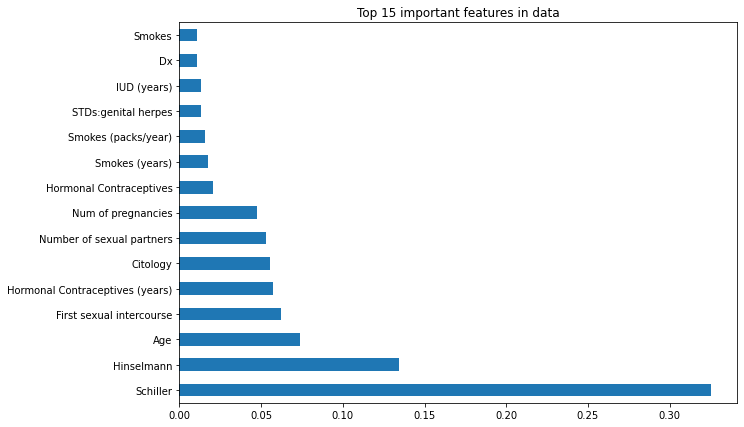

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,7))
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features in data")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=45)
rfc.fit(x_train, y_train)
feats = rfc.feature_importances_
feat_importances=pd.DataFrame()
feat_importances["feature"]=x.columns
feat_importances["Feature score"]=feats


In [ ]:
top=feat_importances.nlargest(15)
top

Schiller                           0.325295
Hinselmann                         0.134388
Age                                0.073516
First sexual intercourse           0.062460
Hormonal Contraceptives (years)    0.057135
Citology                           0.055270
Number of sexual partners          0.053090
Num of pregnancies                 0.047513
Hormonal Contraceptives            0.020655
Smokes (years)                     0.017565
Smokes (packs/year)                0.015817
STDs:genital herpes                0.013480
IUD (years)                        0.013204
Dx                                 0.010930
Smokes                             0.010889
dtype: float64

In [ ]:
x=X_kbest_features

In [ ]:
x.shape

(858, 15)

In [ ]:
y.shape

(1628,)

**Splitting the dataset**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.4, random_state=1)

**standardization**

In [ ]:
x_train = preprocessing.scale(x_train)

In [ ]:
x_train.mean()

6.145607724261314e-16

**MinMaxScaling**

In [ ]:

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.fit_transform(x_test)

#Fitting Model

**Logistic Regression(LR)**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# creating the model
model = LogisticRegression()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.9616666666666667
Testing accuracy : 0.9728682170542635
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       239
           1       0.80      0.84      0.82        19

    accuracy                           0.97       258
   macro avg       0.89      0.91      0.90       258
weighted avg       0.97      0.97      0.97       258

[[235   4]
 [  3  16]]


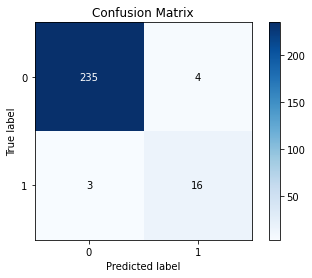

In [ ]:
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.show()#Evaluating the classifier using training set

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


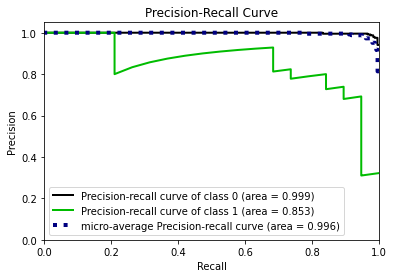

In [ ]:
skplt.metrics.plot_precision_recall_curve(y_true=y_test, y_probas=model.predict_proba(x_test))
plt.show()

**Random Forest Classifier(RF)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model = RandomForestClassifier()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.9983333333333333
Testing accuracy : 0.9651162790697675
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       239
           1       0.75      0.79      0.77        19

    accuracy                           0.97       258
   macro avg       0.87      0.88      0.88       258
weighted avg       0.97      0.97      0.97       258

[[234   5]
 [  4  15]]


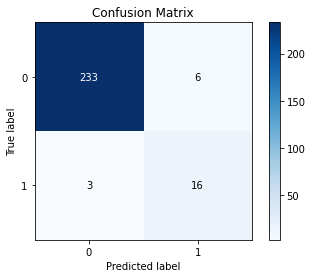

In [ ]:
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.show()#Evaluating the classifier using training set

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


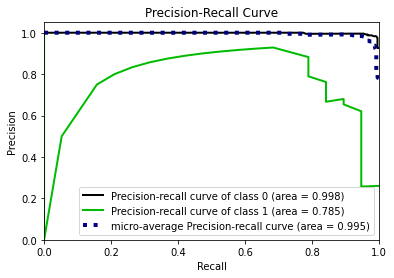

In [ ]:
skplt.metrics.plot_precision_recall_curve(y_true=y_test, y_probas=model.predict_proba(x_test))
plt.show()

**Decision Tree Classifier (DT)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# creating the model
model = DecisionTreeClassifier()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))


Training accuracy : 0.9983333333333333
Testing accuracy : 0.8488372093023255
              precision    recall  f1-score   support

           0       0.98      0.86      0.91       239
           1       0.29      0.74      0.42        19

    accuracy                           0.85       258
   macro avg       0.63      0.80      0.67       258
weighted avg       0.93      0.85      0.88       258

[[205  34]
 [  5  14]]


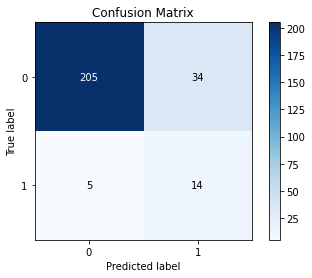

In [ ]:
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.show()#Evaluating the classifier using training set

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


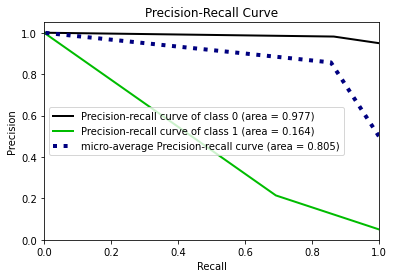

In [ ]:
skplt.metrics.plot_precision_recall_curve(y_true=y_test, y_probas=model.predict_proba(x_test))
plt.show()

**Ada Boost Classifier(AB)**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# creating the model
model3 = AdaBoostClassifier()

# feeding the training data into the model
model3.fit(x_train, y_train)

# predicting the test set results
y_pred = model3.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model3.score(x_train, y_train))
print("Testing accuracy :", model3.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.9816666666666667
Testing accuracy : 0.8372093023255814
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       239
           1       0.26      0.63      0.36        19

    accuracy                           0.84       258
   macro avg       0.61      0.74      0.64       258
weighted avg       0.91      0.84      0.87       258

[[204  35]
 [  7  12]]


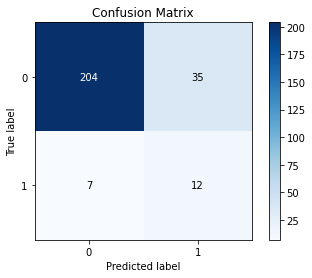

In [ ]:
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.show()#Evaluating the classifier using training set

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


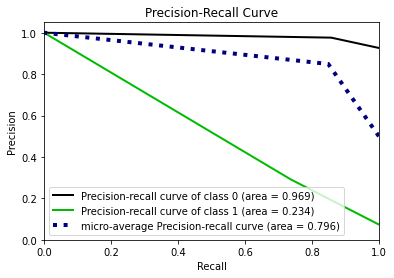

In [ ]:
skplt.metrics.plot_precision_recall_curve(y_true=y_test, y_probas=model.predict_proba(x_test))
plt.show()

**Support vector machine classification (SVC)**

In [ ]:
from sklearn.svm import SVC
clf = svm.SVC(kernel='linear', C=1)
clf.fit(x_train, y_train)
 # predicting the test set results
y_pred = clf.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", clf.score(x_train, y_train))
print("Testing accuracy :", clf.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.96
Testing accuracy : 0.9651162790697675
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       239
           1       0.69      0.95      0.80        19

    accuracy                           0.97       258
   macro avg       0.84      0.96      0.89       258
weighted avg       0.97      0.97      0.97       258

[[231   8]
 [  1  18]]


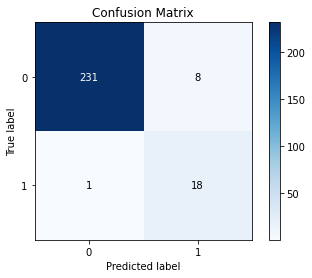

In [ ]:
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.show()#Evaluating the classifier using training set

**Deep Neural Multilayer Perceptron (MLP)**

In [ ]:
from sklearn.neural_network import MLPClassifier
clf1 =MLPClassifier(alpha=1)
clf1.fit(x_train,y_train)
# predicting the test set results
y_pred = clf1.predict(x_test)
# Calculating the accuracies
print("Training accuracy :", clf1.score(x_train,y_train))
print("Testing accuracy :", clf1.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.9616666666666667
Testing accuracy : 0.9728682170542635
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       239
           1       0.80      0.84      0.82        19

    accuracy                           0.97       258
   macro avg       0.89      0.91      0.90       258
weighted avg       0.97      0.97      0.97       258

[[235   4]
 [  3  16]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


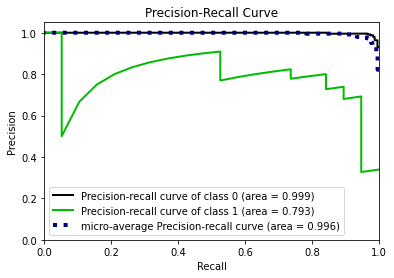

In [ ]:
skplt.metrics.plot_precision_recall_curve(y_true=y_test, y_probas=clf1.predict_proba(x_test))
plt.show()

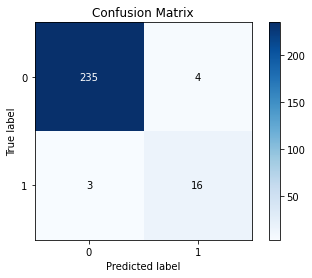

In [ ]:
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.show()#Evaluating the classifier using training set

**The k-Nearest Neighbors (kNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn.score(x_test, y_test)

0.9496124031007752

In [ ]:
# Calculating the accuracies
print("Training accuracy :", knn.score(x_train, y_train))
print("Testing accuracy :", knn.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.9733333333333334
Testing accuracy : 0.9496124031007752
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       239
           1       0.67      0.63      0.65        19

    accuracy                           0.95       258
   macro avg       0.82      0.80      0.81       258
weighted avg       0.95      0.95      0.95       258

[[233   6]
 [  7  12]]


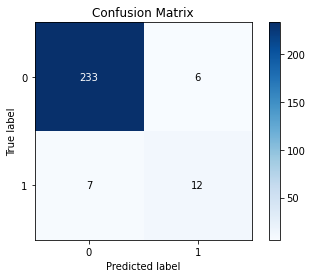

In [ ]:
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.show()#Evaluating the classifier using training set

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


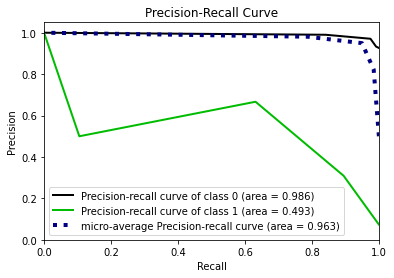

In [ ]:
skplt.metrics.plot_precision_recall_curve(y_true=y_test, y_probas=knn.predict_proba(x_test))
plt.show()

**Gradient Boosting Classifier(GBC)**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
gbd=GradientBoostingClassifier(random_state=0)
gbd.fit(x_train, y_train)
y_pred = gbd.predict(x_test)
gbd.score(x_test, y_test)


0.8565891472868217

In [ ]:
# Calculating the accuracies
print("Training accuracy :", gbd.score(x_train, y_train))
print("Testing accuracy :", gbd.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))
# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.995
Testing accuracy : 0.8565891472868217
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       239
           1       0.31      0.79      0.45        19

    accuracy                           0.86       258
   macro avg       0.65      0.83      0.68       258
weighted avg       0.93      0.86      0.88       258

[[206  33]
 [  4  15]]


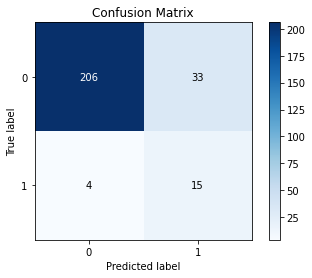

In [ ]:
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.show()#Evaluating the classifier using training set

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


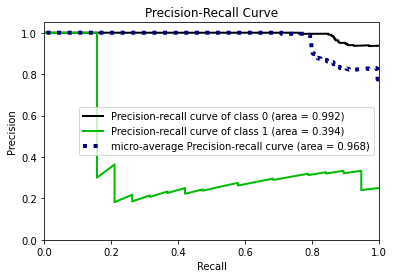

In [ ]:
skplt.metrics.plot_precision_recall_curve(y_true=y_test, y_probas=gbd.predict_proba(x_test))
plt.show()